### Neural network regression with TensorFlow Exercises

#  1. Create own regression data and build a model on it.

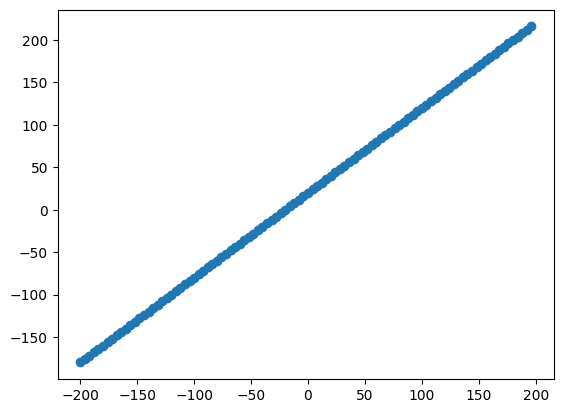

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


X = tf.range(-200 , 200, 4)
y = X + 20

# visualize it
plt.scatter(X, y)

In [4]:
# check the length of data
len(X)

100

In [5]:
# splitting data into training and test
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]


## Building 3 models:
 * Model-1 : 1 layer with sgd optimizer 100 epochs
 * Model-2 : 2 layer with sgd optimizer 100 epochs
 * Model-3 : 1 layer with adam optimizer 100 epochs
 * Model-4 : 2 layer with adam/sgd optimizer 300 epochs

### **Model - 1**
 * layer with sgd optimizer 100 epochs

In [6]:

# random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input-output_layer")
],name="model_1")

# compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
3/3 [==============================] - 5s 10ms/step - loss: 167.4494 - mae: 167.4494
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 30.4926 - mae: 30.4926
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 40.7067 - mae: 40.7067
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 32.0428 - mae: 32.0428
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 41.4967 - mae: 41.4967
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 24.5710 - mae: 24.5710
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 39.0896 - mae: 39.0896
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 41.0670 - mae: 41.0670
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 36.7445 - mae: 36.7445
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 40.4313 - mae: 40.4313
Epoch 11/100
3/3 [==============================] - 0s 6

#### Visualize model, data and prediction

In [7]:
# creating function to check performance
def performance(history):
  return pd.DataFrame(history.history).plot()
  return plt.ylabel("loss")
  return plt.xlabel("epochs")

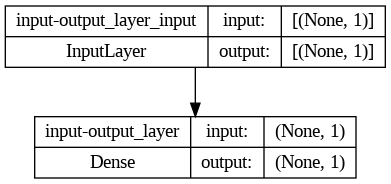

In [8]:
# visualize model
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

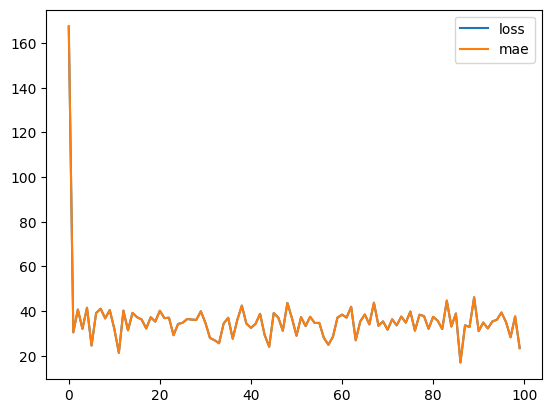

In [9]:
history1 = performance(history_1)

In [10]:
# summarize model
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-output_layer (Dense)  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


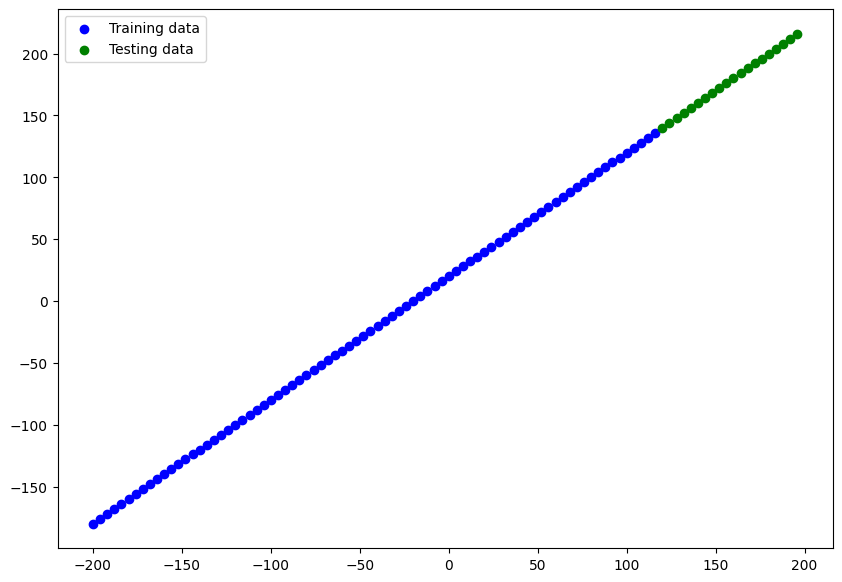

In [11]:
# visualizing data
plt.figure(figsize=(10,7))
# plotting train and test data
plt.scatter( X_train , y_train,  c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [12]:
# predict from model
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[ 68.725494],
       [ 70.9782  ],
       [ 73.2309  ],
       [ 75.483604],
       [ 77.73631 ],
       [ 79.98901 ],
       [ 82.24172 ],
       [ 84.49442 ],
       [ 86.74712 ],
       [ 88.99983 ],
       [ 91.25253 ],
       [ 93.50524 ],
       [ 95.75794 ],
       [ 98.01064 ],
       [100.26335 ],
       [102.51605 ],
       [104.76876 ],
       [107.02146 ],
       [109.27417 ],
       [111.52687 ]], dtype=float32)

In [13]:
# creating plotting function
def plot_predictions(train_data=X_train,
                     train_label= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= y_pred):
  """
  Plots training data , test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot predcitions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legends
  plt.legend();

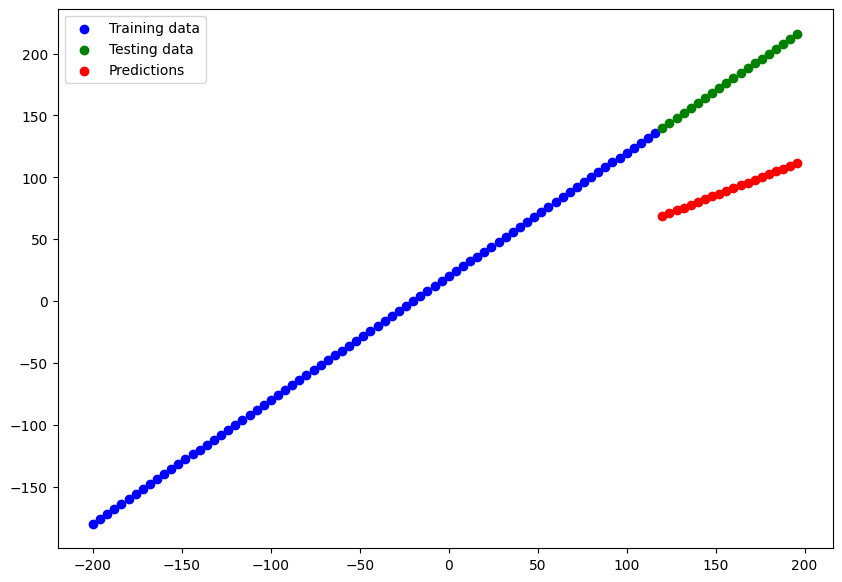

In [14]:
# visualize testing and predicted data
visualize1 = plot_predictions(predictions =y_pred)
visualize1


#### Evaluate model-1

In [15]:
# evaluate model
evalute_model1 = model_1.evaluate(X_test, y_test)
evalute_model1

1/1 [==============================] - 1s 547ms/step - loss: 87.8738 - mae: 87.8738


[87.87381744384766, 87.87381744384766]

 Since we're working on a regression, two of the main metrics:
 * MAE - mean absolute error, "on average, how wrong is each of model's predictions"
 * MSE - mean square error, "square the average errors"

In [16]:
# creating MAE and MSE function
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred= tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred= tf.squeeze(y_pred))


In [17]:
# mse and mae for first model
mae1 = mae(y_test, y_pred)
mse1 = mse(y_test, y_pred)
mae1 , mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=87.87382>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7823.322>)

### **Model - 2** :
 * 2 layer with sgd optimizer 100 epochs

In [18]:
# create model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_2")

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history_2 = model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 76.8610 - mae: 76.8610
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 70.3667 - mae: 70.3667
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 64.5062 - mae: 64.5062
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 58.3475 - mae: 58.3475
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 52.3800 - mae: 52.3800
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 46.1161 - mae: 46.1161
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 40.1842 - mae: 40.1842
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 34.4188 - mae: 34.4188
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 28.4072 - mae: 28.4072
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 23.1700 - mae: 23.1700
Epoch 11/100
3/3 [==============================] - 0s 6ms/

#### Visualize Model and prediction

<Axes: >

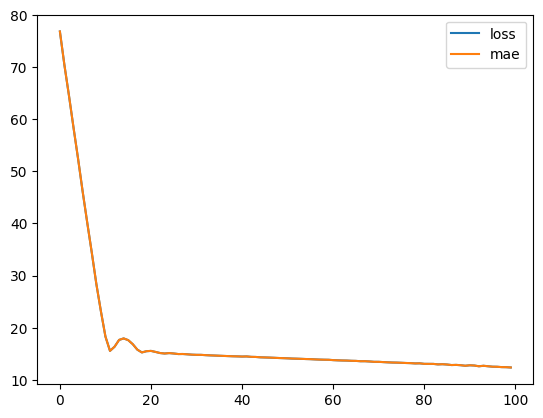

In [19]:
# visualize performance
performance(history_2)

In [20]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


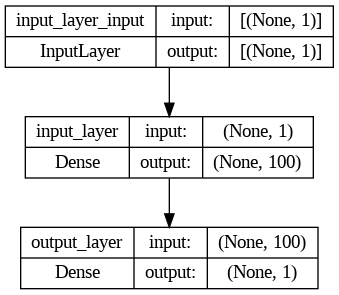

In [21]:
# visualize model
plot_model(model= model_2, show_shapes=True)

In [22]:
predict_2 = model_2.predict(X_test)
predict_2

1/1 [==============================] - 0s 69ms/step


array([[112.86709 ],
       [116.493225],
       [120.11936 ],
       [123.74551 ],
       [127.37165 ],
       [130.99779 ],
       [134.62393 ],
       [138.25008 ],
       [141.87622 ],
       [145.50237 ],
       [149.12851 ],
       [152.75465 ],
       [156.38078 ],
       [160.00691 ],
       [163.63306 ],
       [167.25919 ],
       [170.88533 ],
       [174.51147 ],
       [178.1376  ],
       [181.76375 ]], dtype=float32)

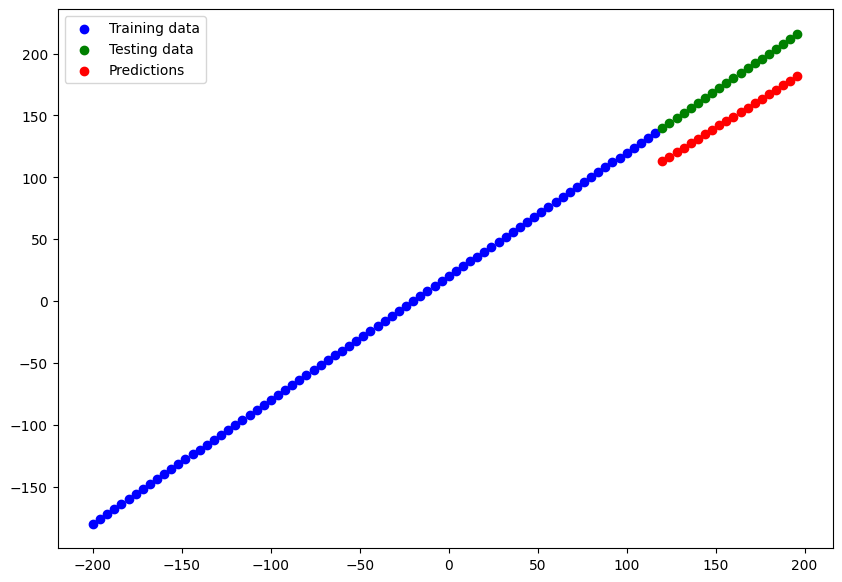

In [23]:
# plot data, prediction
visualize2 = plot_predictions(predictions=predict_2)

#### Evaluate model-2

In [24]:
# evaluate
evaluate_model2 = model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 154ms/step - loss: 30.6846 - mae: 30.6846


In [25]:
# mse and mae
mae2 = mae(y_test, predict_2)
mse2 = mse(y_test, predict_2)
mse2, mae2

(<tf.Tensor: shape=(), dtype=float32, numpy=946.1906>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.684576>)

### **Model - 3**:
 * 1 layer with adam optimizer 100 epochs

In [26]:
# create model
# set random seed
tf.random.set_seed(42)

# model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,name="hidden_layer")
], name="model_3")

# compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.legacy.Adam(),
    metrics=["mae"]
)

# fit model
history_3 = model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 9ms/step - loss: 57.4156 - mae: 57.4156
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 57.1564 - mae: 57.1564
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 56.9209 - mae: 56.9209
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 56.6740 - mae: 56.6740
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 56.4320 - mae: 56.4320
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 56.1766 - mae: 56.1766
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 55.9319 - mae: 55.9319
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 55.6903 - mae: 55.6903
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 55.4326 - mae: 55.4326
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 55.1913 - mae: 55.1913
Epoch 11/100
3/3 [==============================] - 0s 6ms/

#### Visualize Model and prediction


<Axes: >

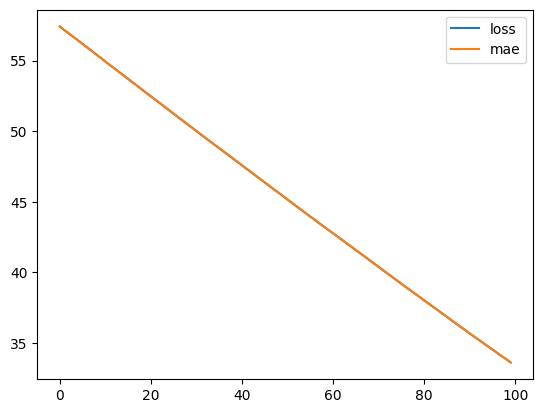

In [27]:
# visualize model
performance(history_3)

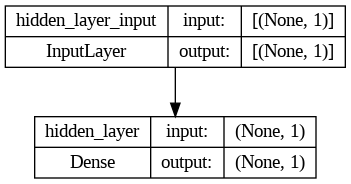

In [28]:
plot_model(model=model_3, show_shapes=True )

In [29]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
predict3= model_3.predict(X_test)
predict3

1/1 [==============================] - 0s 38ms/step


array([[ 69.82345 ],
       [ 72.15289 ],
       [ 74.48233 ],
       [ 76.81177 ],
       [ 79.14121 ],
       [ 81.47065 ],
       [ 83.800095],
       [ 86.12953 ],
       [ 88.45897 ],
       [ 90.788414],
       [ 93.11785 ],
       [ 95.447296],
       [ 97.77673 ],
       [100.10617 ],
       [102.435616],
       [104.76505 ],
       [107.0945  ],
       [109.423935],
       [111.75338 ],
       [114.08282 ]], dtype=float32)

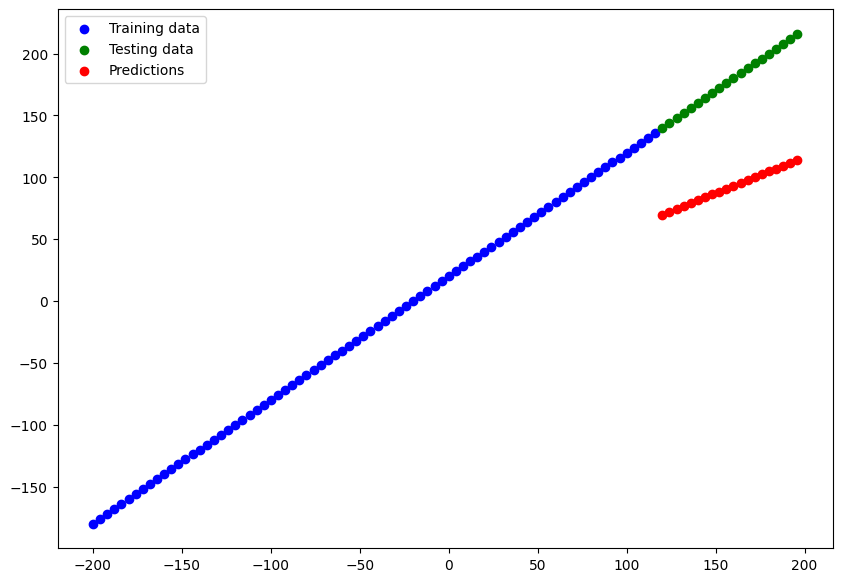

In [31]:
visualize3 = plot_predictions(predictions=predict3)

#### Evaluate model-3

In [32]:
evaluate_model3= model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 86.0469 - mae: 86.0469


In [33]:
mse3 = mse(y_test, predict3)
mae3 = mae(y_test, predict3)
mse3, mae3

(<tf.Tensor: shape=(), dtype=float32, numpy=7496.8564>,
 <tf.Tensor: shape=(), dtype=float32, numpy=86.04687>)

### **Model - 4**  :
 * 2 layer with adam/sgd optimizer 300 epochs

In [34]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer1"),
    tf.keras.layers.Dense(50, name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="last_layer")
],name="model_4")

model_4.compile(
    loss="mae",
    optimizer= tf.keras.optimizers.legacy.Adam(),
    metrics="mae"
)

history_4 = model_4.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 86.6107 - mae: 86.6107
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 50.0269 - mae: 50.0269
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 20.9727 - mae: 20.9727
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 25.5525 - mae: 25.5525
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 32.2545 - mae: 32.2545
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 28.9821 - mae: 28.9821
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 22.9341 - mae: 22.9341
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 16.7696 - mae: 16.7696
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 19.8676 - mae: 19.8676
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 19.0504 - mae: 19.0504
Epoch 11/100
3/3 [==============================] - 0s 5ms/

#### visualize model and predictions

<Axes: >

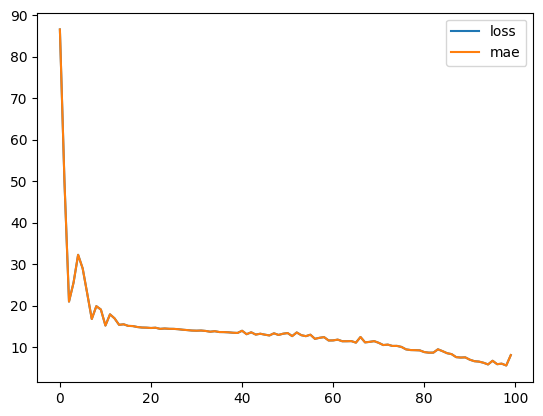

In [35]:
# visualizing model
performance(history_4)

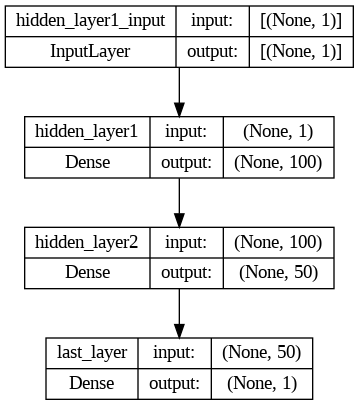

In [36]:
plot_model(model=model_4, show_shapes=True)

In [37]:
predict4 = model_4.predict(X_test)
predict4

1/1 [==============================] - 0s 49ms/step


array([[135.19815],
       [139.21536],
       [143.23254],
       [147.24976],
       [151.26698],
       [155.28418],
       [159.30136],
       [163.31857],
       [167.33578],
       [171.35298],
       [175.37018],
       [179.38737],
       [183.40459],
       [187.42178],
       [191.43898],
       [195.45619],
       [199.4734 ],
       [203.49062],
       [207.5078 ],
       [211.52502]], dtype=float32)

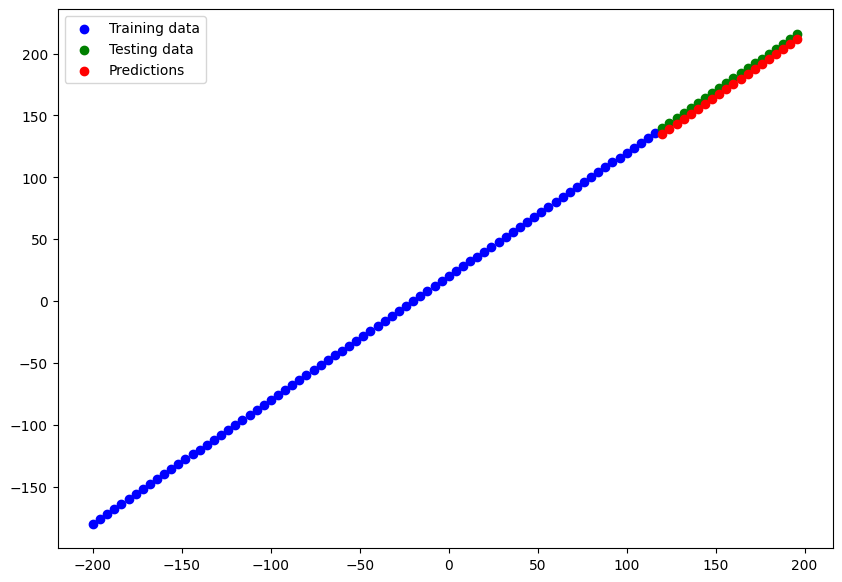

In [38]:
# visualize prediction
plot_predictions(predictions=predict4)

#### Evaluate model-4

In [39]:
evaluate_model4 = model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 4.6384 - mae: 4.6384


In [40]:
#mae and mse
mae4 = mae(y_test, predict4)
mse4 = mse(y_test, predict4)
mae4, mse4

(<tf.Tensor: shape=(), dtype=float32, numpy=4.638419>,
 <tf.Tensor: shape=(), dtype=float32, numpy=21.524775>)

### **Comparing Model**
 * comapare visuals and mae/mse

(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

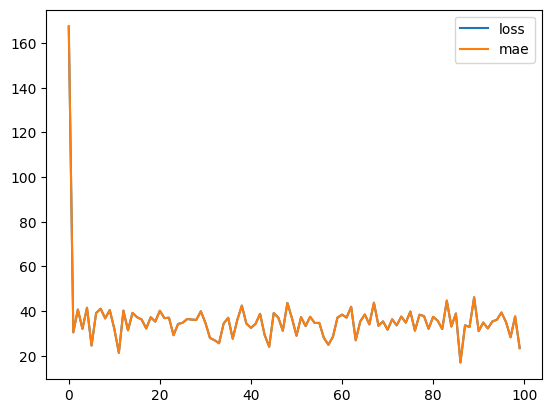

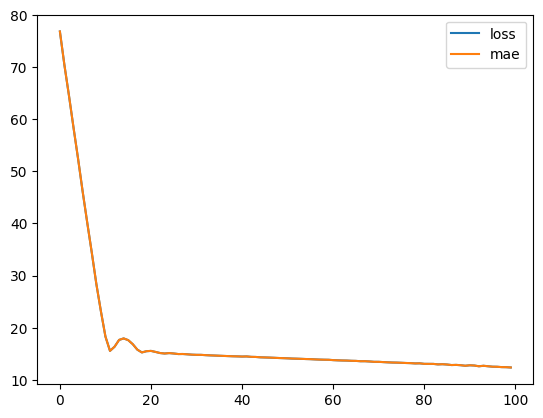

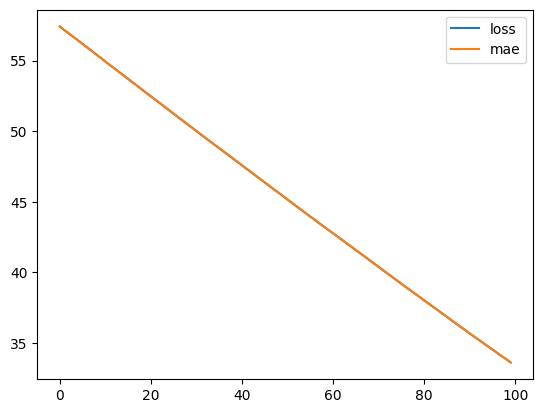

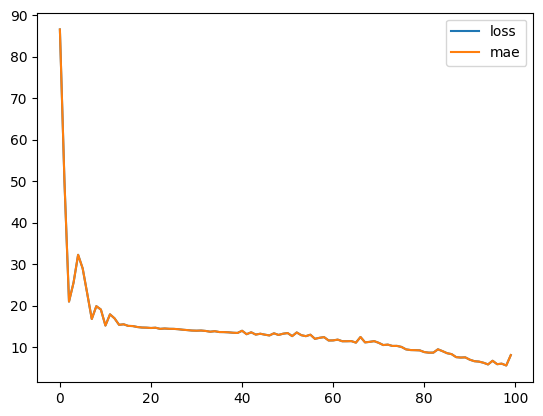

In [41]:
# compare visuals
performance(history_1) , performance(history_2), performance(history_3), performance(history_4)

In [42]:
model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2",  mae2.numpy(), mse2.numpy()],
                 ["model_3",  mae3.numpy(), mse3.numpy()],
                 ["model_4",  mae4.numpy(), mse4.numpy()]]

results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
results

,Model,MAE,MSE
0,model_1,87.873817,7823.321777
1,model_2,30.684576,946.190613
2,model_3,86.046867,7496.856445
3,model_4,4.638419,21.524775


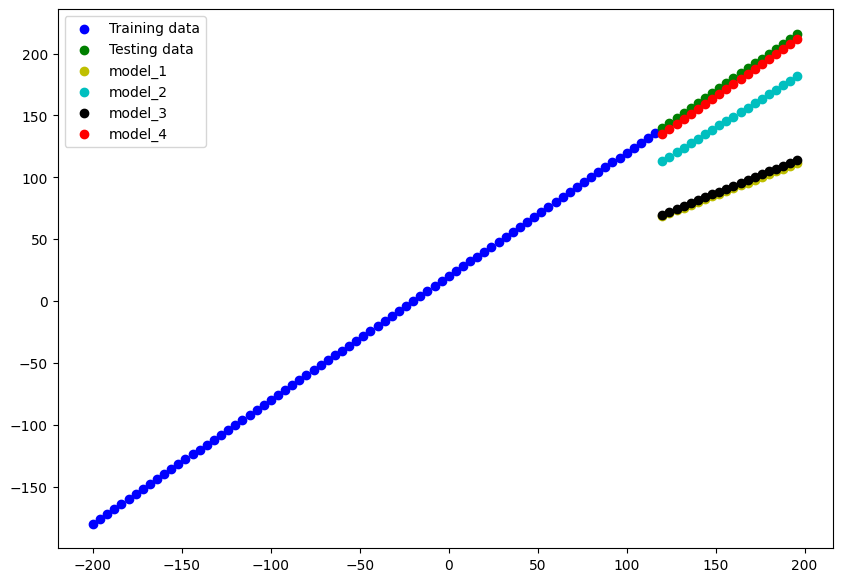

In [43]:
"""
   Plots training data , test data and compares predictions to ground truth
"""

plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# plot predcitions of model1 in yellow
plt.scatter(X_test, y_pred, c="y", label="model_1")
# plot prediction of model2 in cyan
plt.scatter(X_test, predict_2, c="c", label="model_2" )
# plot predction of model3 in black
plt.scatter(X_test, predict3, c="k", label="model_3")
# plot predcition of model4 in red
plt.scatter(X_test, predict4, c="r", label="model_4")
# show the legends
plt.legend()

# 2. Building a larger model and improving it.
  * Increasing layer
  * Increasing neurons in layer
  * Optimizing through optimizers
  * Increasing epochs

Importing Insurance Data and libraries

In [44]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# read data and see
insurance =  pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Splitting and Preprocessing Data

In [46]:
# split data in x and y
X = insurance.drop(["charges"], axis=1)
y = insurance["charges"]

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),# turn all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# spliting to training and test
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# fit the column transformer to training data
ct.fit(X_train)

# transform training and test data with normaliztion(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [47]:
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

## Creating Model

In [78]:
# random seed
tf.random.set_seed(42)

# creating model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
],name= "insurance_model")

# compile the  model
insurance_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# stoppping early
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss" , patience=3)

# fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=100 )

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9294.7188 - mae: 9294.7188
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 4643.7754 - mae: 4643.7754
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3745.6418 - mae: 3745.6418
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3716.0796 - mae: 3716.0796
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3656.7476 - mae: 3656.7476
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3718.7397 - mae: 3718.7397
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3641.1870 - mae: 3641.1870
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3626.8252 - mae: 3626.8252
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3649.9407 - mae: 3649.9407
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3600.7954 - mae: 3600.7954

Text(0, 0.5, 'loss')

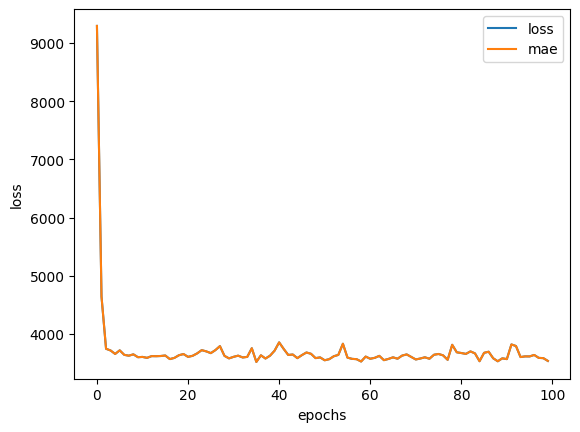

In [79]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

# 3. Create Model on Boston Dataset

## Import data and visualize data

In [84]:
# import data
dataset = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
dataset

57026/57026 [==============================] - 0s 0us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

AttributeError: ignored